**Chat with Documents using RAG (Retreival Augment Generation)**

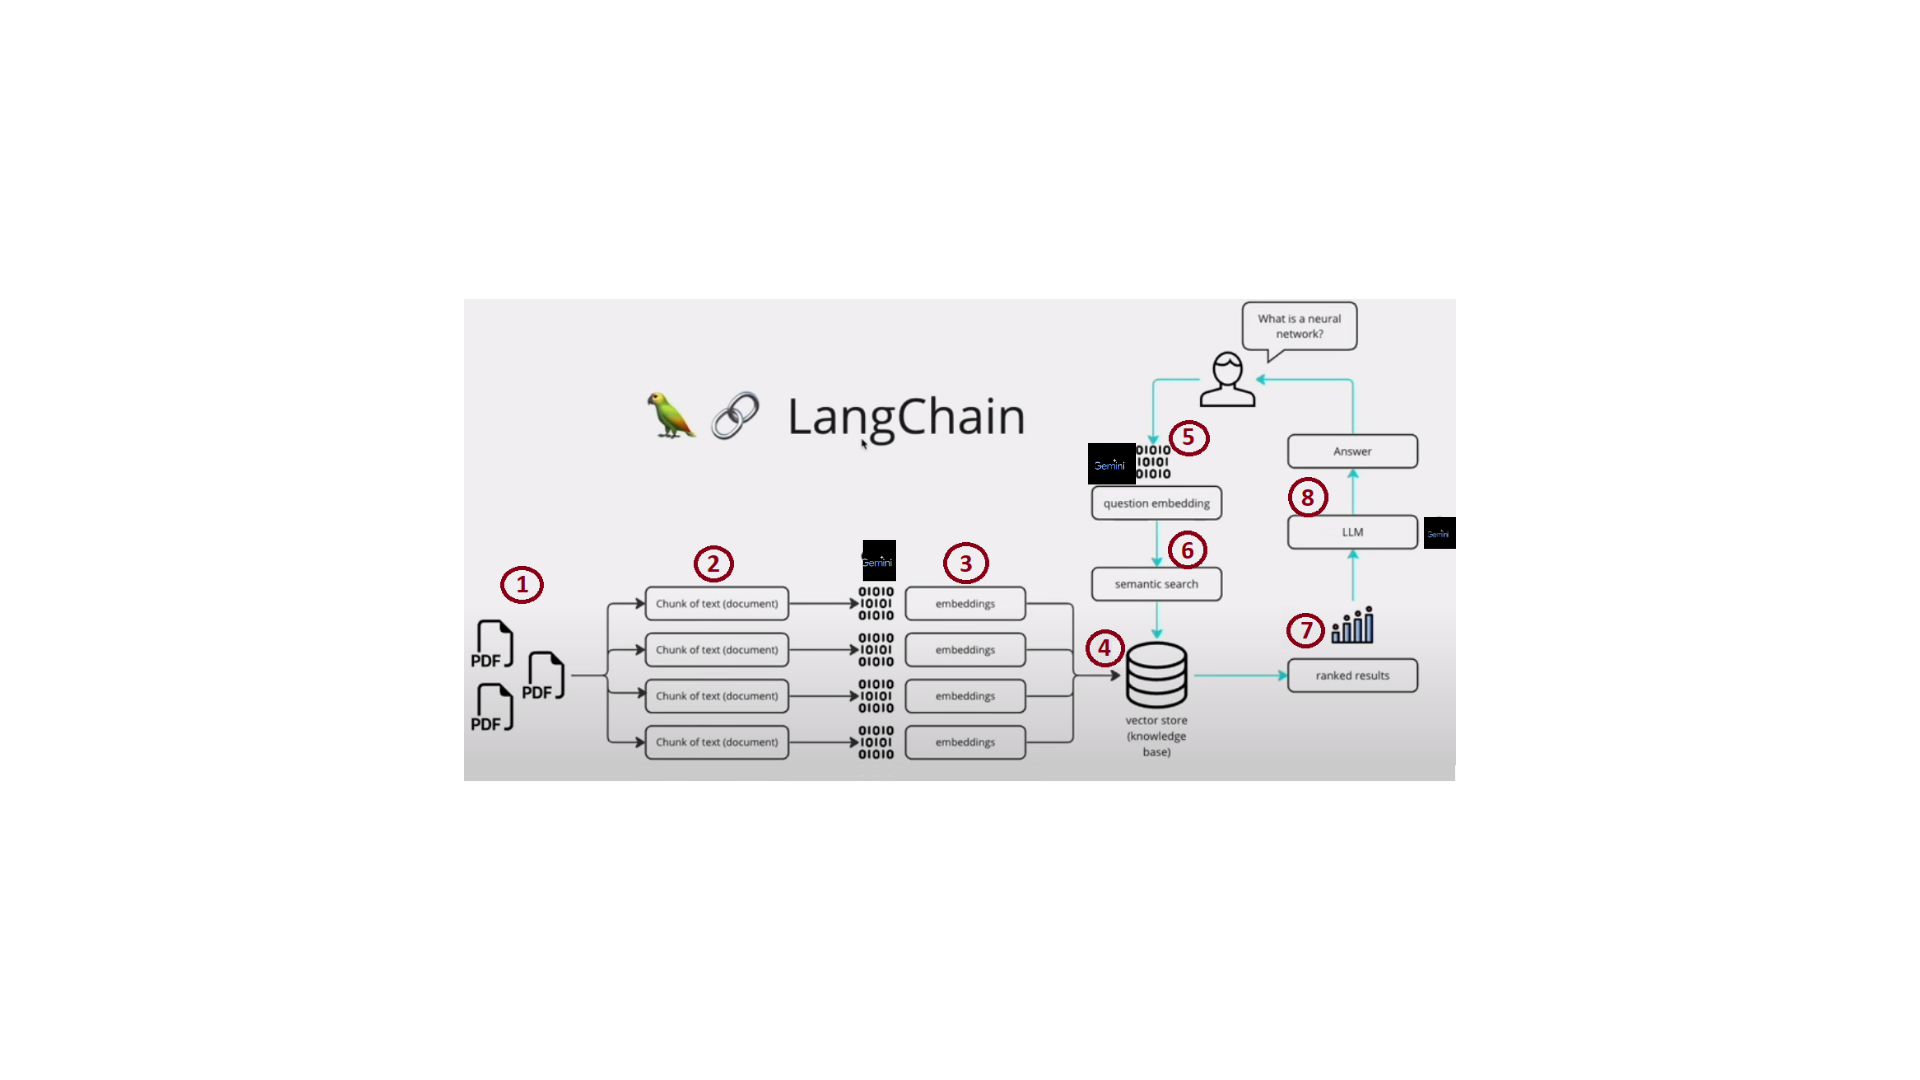

In [50]:
import PIL.Image

img = PIL.Image.open('/content/RAG.png')
img

In [51]:
! pip install -q --upgrade google-generativeai langchain-google-genai chromadb pypdf


In [52]:
import urllib
import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA



warnings.filterwarnings("ignore")

In [53]:
from IPython.display import display
from IPython.display import Markdown
import textwrap


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [54]:
from langchain_google_genai import ChatGoogleGenerativeAI


In [55]:
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

model = ChatGoogleGenerativeAI(model="gemini-2.5-pro",google_api_key=GOOGLE_API_KEY,
                             temperature=0.2,convert_system_message_to_human=True)

**Extract text from the PDF**

In [56]:
pdf_loader = PyPDFLoader("/content/Ikigai - The Japanese secret to a long and happy life.pdf")
pages = pdf_loader.load_and_split()
print(pages[16].page_content)

Aging’s	escape	velocity
For	more	than	a	century,	we’ve	managed	to	add	an	average	of	0.3	years	to	our	life
expectancy	every	year.	But	what	would	happen	if	we	had	the	technology	to	add	a
year	of	life	expectancy	every	year?	In	theory,	we	would	achieve	biological
immortality,	having	reached	aging’s	“escape	velocity.”
Aging’s	Escape	Velocity	and	the	Rabbit
Imagine	a	sign	far	off	in	the	future	with	a	number	on	it	that
represents	the	age	of	your	death.	Every	year	that	you	live,
you	advance	closer	to	the	sign.	When	you	reach	the	sign,	you	die.
Now	imagine	a	rabbit	holding	the	sign	and	walking	to	the	future.	Every
year	that	you	live,	the	rabbit	is	half	a	year	as	far	away.	After	a	while,	you
will	reach	the	rabbit	and	die.
But	what	if	the	rabbit	could	walk	at	a	pace	of	one	year	for	every	year
of	your	life?	You	would	never	be	able	to	catch	the	rabbit,	and	therefore
you	would	never	die.
The	speed	at	which	the	rabbit	walks	to	the	future	is	our	technology.
The	more	we	advance	technology	and	knowledge

In [57]:
len(pages)

119

**RAG Pipeline: Embedding + Gemini (LLM)**

In [58]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [59]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=1000)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)

In [60]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=GOOGLE_API_KEY)

In [61]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs={"k":5})

In [70]:
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True

)


In [71]:
question = "Describe the Multi-head attention layer in detail?"
result = qa_chain({"query": question})
result["result"]


'Based on the context provided, I cannot answer the question. The provided text discusses concepts like "ikigai," "flow," longevity, diet, and focus, but it does not contain any information about the Multi-head attention layer or any other technical concepts from machine learning or artificial intelligence.'

In [72]:
question = "What is Moai?"
result = qa_chain({"query": question})
result["result"]

"Based on the context provided, a moai is an informal group of people in Okinawa with common interests who look out for one another. Here are the key details:\n\n*   **Purpose:** A moai provides a sense of belonging, security, and both emotional and financial stability, which helps increase life expectancy. For many, serving the community through their moai becomes part of their *ikigai* (reason for being).\n*   **Origin:** The practice originated with farmers who would get together to share best practices and help one another cope with poor harvests.\n*   **How it works:** Members make a set monthly contribution. This money funds group activities like meetings, dinners, and games. If there is a surplus, one member receives a set amount on a rotating basis. Members in financial trouble can also get an advance from the group's savings."

In [73]:
Markdown(result["result"])

Based on the context provided, a moai is an informal group of people in Okinawa with common interests who look out for one another. Here are the key details:

*   **Purpose:** A moai provides a sense of belonging, security, and both emotional and financial stability, which helps increase life expectancy. For many, serving the community through their moai becomes part of their *ikigai* (reason for being).
*   **Origin:** The practice originated with farmers who would get together to share best practices and help one another cope with poor harvests.
*   **How it works:** Members make a set monthly contribution. This money funds group activities like meetings, dinners, and games. If there is a surplus, one member receives a set amount on a rotating basis. Members in financial trouble can also get an advance from the group's savings.

In [75]:
result["source_documents"]

[Document(metadata={}, page_content='VII\nTHE\t\nIKIGAI\n\tDIET\nWhat\tthe\tworld’s\tlongest-living\npeople\teat\tand\t\ndrink\n\nA\nCCORDING\tTO\tTHE\t\nWorld\tHealth\tOrganization,\tJapan\thas\tthe\thighest\tlife\texpectancy\tin\tthe\tworld:\t85\tyears\tfor\nmen\tand\t87.3\tyears\tfor\twomen.\tMoreover,\tit\thas\tthe\thighest\tratio\tof\tcentenarians\tin\tthe\tworld:\tmore\tthan\n520\tfor\tevery\tmillion\tpeople\t(as\tof\tSeptember\t2016).\nSource:\tWorld\tHealth\tOrganization,\t1966;\tJapanese\tMinistry\tof\tHealth,\tLabor\tand\tWelfare,\t2004;\tU.S.\nDepartment\tof\tHealth\tand\tHuman\tServices/CDC,\t2005\nThe\tabove\tgraphic,\twhich\tcompares\tlife\texpectancy\tin\tJapan,\tits\tprovince\nOkinawa,\tSweden,\tand\tthe\tUnited\tStates,\t\nshows\tthat,\twhile\tlife\texpectancy\tin\nJapan\tis\thigh\toverall,\tOkinawa\texceeds\tthe\tnational\taverage.\nOkinawa\tis\tone\tof\tthe\tareas\tin\tJapan\tthat\twere\tmost\taffected\tby\tWorld\tWar\tII.\nAs\ta\tresult\tnot\tonly\tof\tconflicts\ton

In [74]:
question = "Describe Random forest?"
result = qa_chain({"query": question})
Markdown(result["result"])

Based on the context provided, I cannot answer that question. The text discusses the "Ikigai Diet," longevity, and lifestyle habits of the world's longest-living people, but it does not contain any information about Random Forest.

In [76]:
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)# Run chain
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)



In [77]:
question = "What is Okinawan diet in detail?"
result = qa_chain({"query": question})
result["result"]


'Based on the provided text, the Okinawan diet consists of the following:\n\n*   **Variety:** They eat a wide variety of foods, especially vegetables, averaging eighteen different foods each day.\n*   **Fruits and Vegetables:** At least five servings daily are consumed, with staples being vegetables, potatoes, legumes, and soy products like tofu. Over 30% of their daily calories come from vegetables.\n*   **Grains:** Grains, primarily white rice, are the foundation of their diet.\n*   **Low Sugar and Salt:** They rarely eat sugar and consume one-third as much as the rest of Japan. They also eat half as much salt, averaging 7 grams per day.\n*   **Fish and Meat:** Fish is eaten about three times per week, while pork is consumed only once or twice per week.\n*   **Calorie Restriction:** They practice "hara hachi bu" (eating until 80% full), consuming an average of 1,785 calories daily.\n*   **Key Foods:** A list of 15 antioxidant-rich foods includes tofu, miso, tuna, carrots, goya (bitte

In [78]:
Markdown(result["result"])

Based on the provided text, the Okinawan diet consists of the following:

*   **Variety:** They eat a wide variety of foods, especially vegetables, averaging eighteen different foods each day.
*   **Fruits and Vegetables:** At least five servings daily are consumed, with staples being vegetables, potatoes, legumes, and soy products like tofu. Over 30% of their daily calories come from vegetables.
*   **Grains:** Grains, primarily white rice, are the foundation of their diet.
*   **Low Sugar and Salt:** They rarely eat sugar and consume one-third as much as the rest of Japan. They also eat half as much salt, averaging 7 grams per day.
*   **Fish and Meat:** Fish is eaten about three times per week, while pork is consumed only once or twice per week.
*   **Calorie Restriction:** They practice "hara hachi bu" (eating until 80% full), consuming an average of 1,785 calories daily.
*   **Key Foods:** A list of 15 antioxidant-rich foods includes tofu, miso, tuna, carrots, goya (bitter melon), kombu (sea kelp), sweet potato, and peppers.
*   **Drinks:** They drink Sanpin-cha (a mix of green tea and jasmine) and juice from the shikuwasa citrus fruit.

Thanks for asking

In [79]:
question = "Describe Random forest?"
result = qa_chain({"query": question})
Markdown(result["result"])

I don't know.
thanks for asking